In [8]:
## Population correlation of the first 5 presentations of all 4 animals (S+, S-, NM and F)

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import helperFunc  # must be in the same folder as this notebook




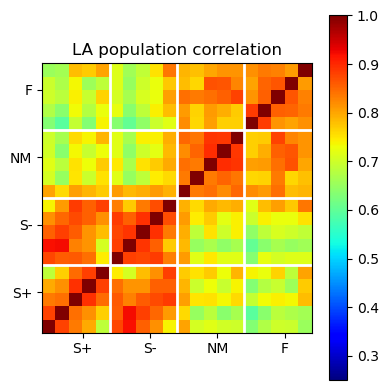

Saved figures for LA -> C:\Users\Cristina\Documents\GitHub\BLAPIRpaper\Figure3B\LA_experiment1.png, C:\Users\Cristina\Documents\GitHub\BLAPIRpaper\Fig3B\PIR_experiment1.svg


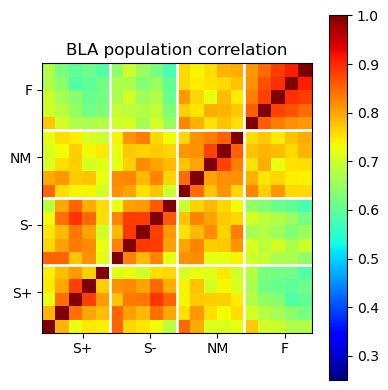

Saved figures for BLA -> C:\Users\Cristina\Documents\GitHub\BLAPIRpaper\Figure3B\BLA_experiment1.png, C:\Users\Cristina\Documents\GitHub\BLAPIRpaper\Fig3B\PIR_experiment1.svg


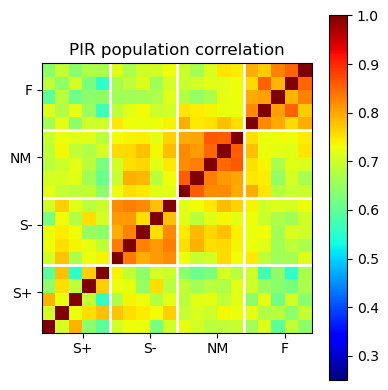

Saved figures for PIR -> C:\Users\Cristina\Documents\GitHub\BLAPIRpaper\Figure3B\PIR_experiment1.png, C:\Users\Cristina\Documents\GitHub\BLAPIRpaper\Fig3B\PIR_experiment1.svg


In [9]:
# ============================================================
# Paths & setup
# ============================================================
cwd = Path.cwd()

# Input files (adjust names if your files differ)
masterlist_path = cwd / "masterlist_experiment1task.csv"
datapath = cwd / "data_timewarped/alltrials"
catchpath = cwd / "data_timewarped/catchtrials"

# Output folder
outdir = cwd / "Figure3B"
outdir.mkdir(exist_ok=True)

savename = "experiment1"

# Brain areas to process
areas = ['LA', 'BLA', 'PIR']


# ============================================================
# Load master list of neurons
# ============================================================
masterlist = np.loadtxt(masterlist_path, delimiter=",", dtype=str)


# ============================================================
# Main loop over brain areas
# ============================================================
for area in areas:
    # Select all neurons in this area
    neuronlist = masterlist[np.where(masterlist[:, 2] == area)]

    allreward, allunreward, allnovelmale, allfemale = None, None, None, None

    for n, nn in enumerate(neuronlist):
        # nn = [subject, session, area, neuron_id, ...]
        basename = "_".join(nn[:4])

        rewardeddata   = np.load(datapath / f"{basename}_rewarded.npy")
        unrewardeddata = np.load(datapath / f"{basename}_unrewarded.npy")
        novelmaledata  = np.load(catchpath / f"{basename}_novelmale.npy")
        femaledata     = np.load(catchpath / f"{basename}_female.npy")

        # Skip if not enough catch trials
        if novelmaledata.shape[0] < 5 or femaledata.shape[0] < 5:
            continue

        trials = np.arange(0, 5)  # take first 5 trials

        if n == 0 or allreward is None:
            allreward    = rewardeddata[trials, :]
            allunreward  = unrewardeddata[trials, :]
            allnovelmale = novelmaledata[trials, :]
            allfemale    = femaledata[trials, :]
        else:
            allreward    = np.dstack((allreward, rewardeddata[trials, :]))
            allunreward  = np.dstack((allunreward, unrewardeddata[trials, :]))
            allnovelmale = np.dstack((allnovelmale, novelmaledata[trials, :]))
            allfemale    = np.dstack((allfemale, femaledata[trials, :]))

    # ========================================================
    # Average over peak sensory period (time bins 13–16)
    # ========================================================
    toplot = np.vstack((
        np.mean(allreward[:, 13:17, :], axis=1),
        np.mean(allunreward[:, 13:17, :], axis=1),
        np.mean(allnovelmale[:, 13:17, :], axis=1),
        np.mean(allfemale[:, 13:17, :], axis=1),
    ))

    # ========================================================
    # Compute and plot correlation matrix
    # ========================================================
    corr_matrix = np.corrcoef(toplot)

    fig, ax = plt.subplots(1, figsize=(4, 4))
    im = ax.imshow(corr_matrix, vmin=0.25, vmax=1, cmap="jet", interpolation="none")

    # Set ticks at the middle of each condition block
    ax.set_xticks((2.5, 7.5, 12.5, 17.5))
    ax.set_yticks((2.5, 7.5, 12.5, 17.5))

    ax.set_ylim(-0.5, 19.5)

    # Draw white gridlines to separate conditions
    ax.vlines([4.5, 9.5, 14.5], ymin=-0.5, ymax=19.5, color="white", linewidth=2)
    ax.hlines([4.5, 9.5, 14.5], xmin=-0.5, xmax=19.5, color="white", linewidth=2)

    ax.set_xticklabels(["S+", "S-", "NM", "F"])
    ax.set_yticklabels(["S+", "S-", "NM", "F"])
    ax.set_title(f"{area} population correlation")

    plt.colorbar(im)
    plt.tight_layout()

    # Save figures (PNG + SVG)
    png_path = outdir / f"{area}_{savename}.png"
    plt.show()
    fig.savefig(png_path, dpi=300)

    plt.close(fig)  # avoid displaying too many figures
    print(f"Saved figures for {area} -> {png_path}, {svg_path}")
